# Lesson 2: Embeddings

**EMBEDDINGS** are numerical representations of text that computers can more easily process. This makes them one of the most important components of large language models. 

### Setup
Load needed API keys and relevant Python libaries.

In [ ]:
# Other packages you would have to install for the visualizations are 
# umap-learn, Altair, and datasets for the Wikipedia dataset.
# !pip install cohere umap-learn altair datasets

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [ ]:
import cohere
co = cohere.Client(os.environ['COHERE_API_KEY'])

The Cohere library is an extensive library of functions that use large language models and they can be called via API calls.

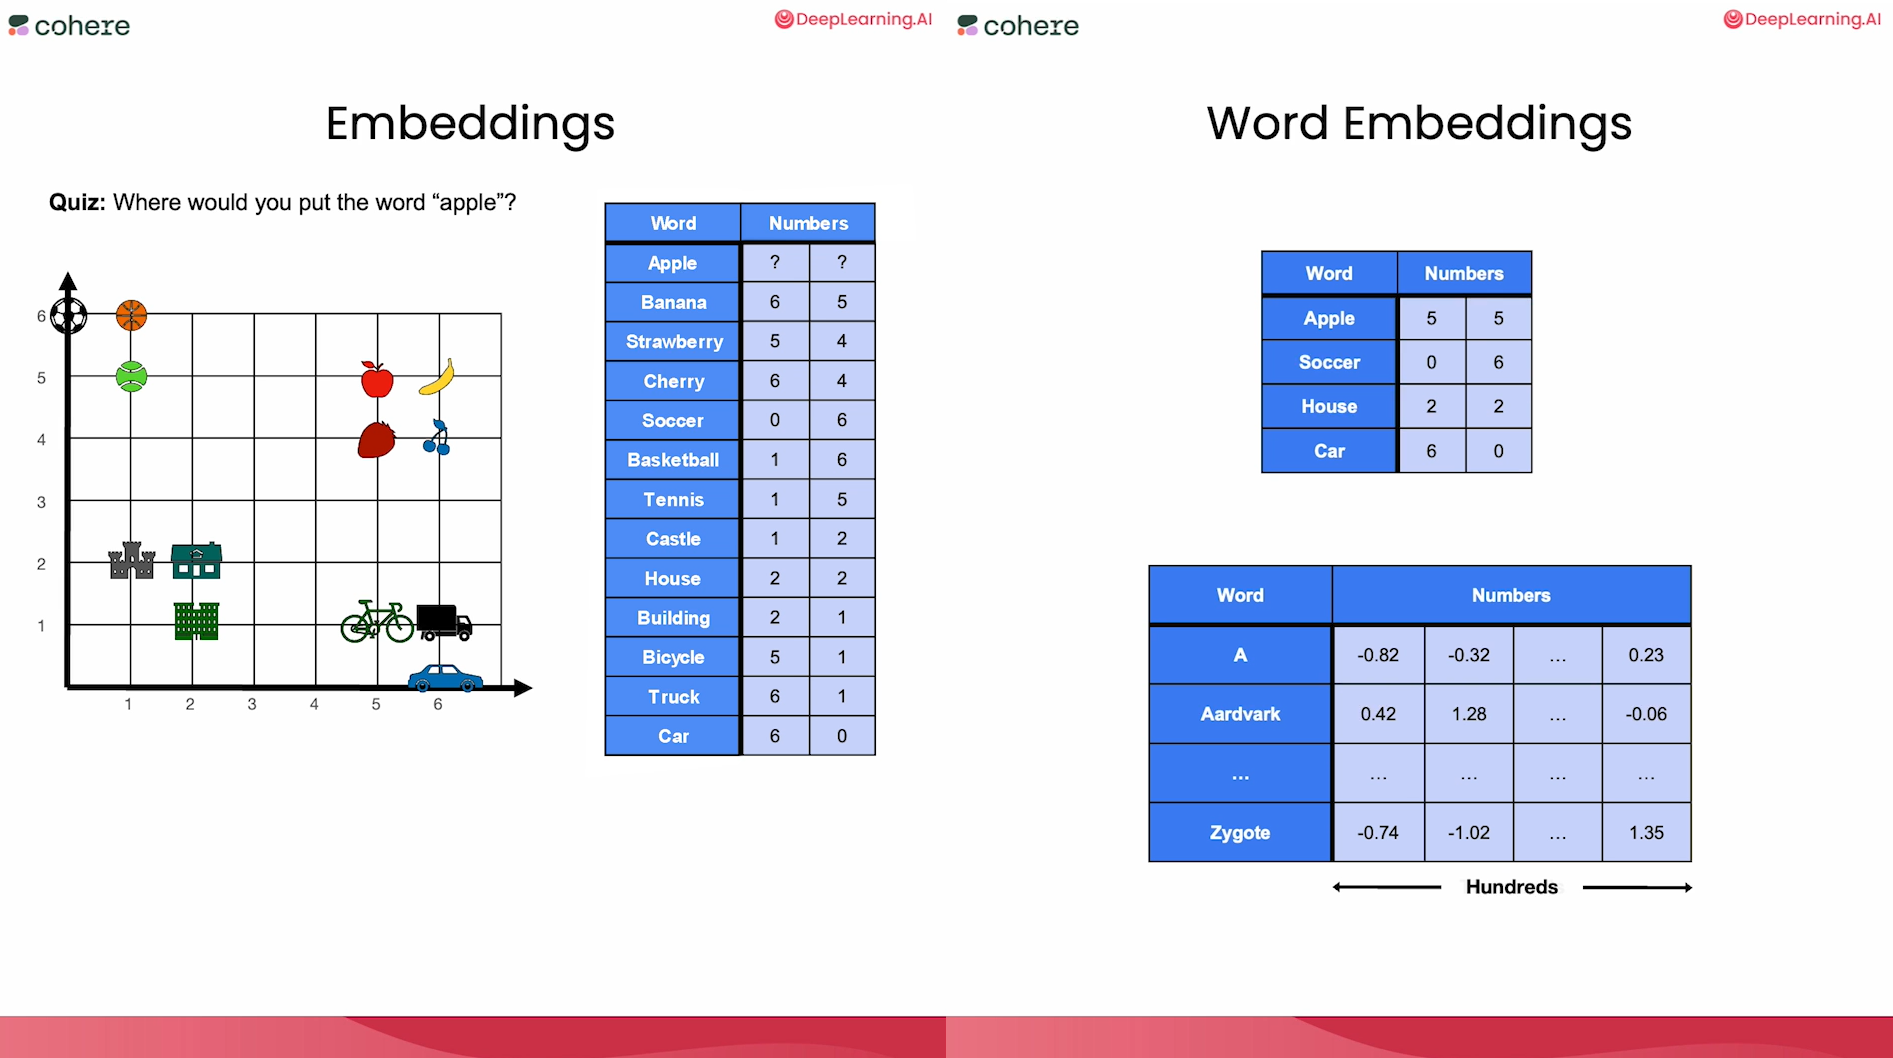

So first let me tell you what an embedding is. 

Over here we have a grid with a horizontal and a vertical axis and coordinates, and we have a bunch of words located in this grid as you can see. Given the locations of these words, where would you put the word apple? As you can see in this embedding, similar words are grouped together. So in the top left you have sports, in the bottom left you have houses and buildings and castles, in the bottom right you have vehicles like bikes and cars, and in the top right you have fruits. So the apple would go among the fruits. Then the coordinates for Apple here are 5'5 because we are associating each word in the table in the right to two numbers, the horizontal and the vertical coordinate.

This is an embedding. Now this embedding sends each word to two numbers like this. In general, embeddings would send words to a lot more numbers and we would have all the possible words. Embeddings that we use in practice could send a word to hundreds of different numbers or even thousands. 

In [ ]:
import pandas as pd

## Word Embeddings

Consider a very small dataset of three words.

In [ ]:
three_words = pd.DataFrame({'text':
  [
      'joy',
      'happiness',
      'potato'
  ]})

three_words

*OUTPUT*

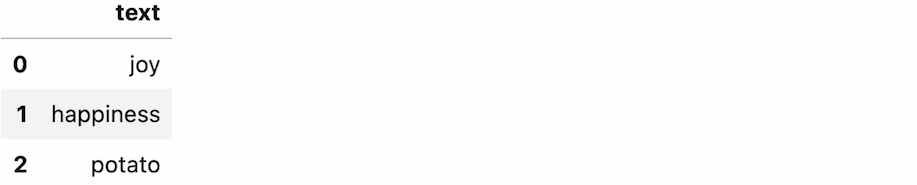

Let's create the embeddings for the three words:

In [ ]:
three_words_emb = co.embed(texts=list(three_words['text']),
                           model='embed-english-v2.0').embeddings

The next step is to create embeddings for these three words. We're going to call them `three_words_emb` and to create the embeddings we're going to call the cohere function embed. The embed function takes some inputs. The first one is the data set that we want to embed which is called three words for this table and we also have to specify the column which is called `text`. Next we specify which of the cohere models we want to use and finally we extract the embeddings from there. So now we have our three words embeddings. 

In [ ]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]

Now let's take a look at the vector associated with each one of the words. The one associated with word joy, we're going to call it "word_1". And the way we get it is by looking at "three_words_emb" and taking the first row. Now we're going to do the same thing with "word_2" and "word_3". Those are the vectors corresponding to the words happiness and potato. 

In [ ]:
word_1[:10]

*OUTPUT*
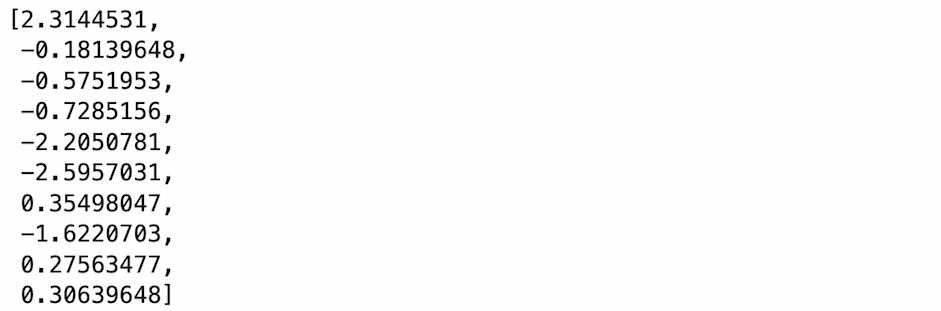

Just out of curiosity, let's look at the first 10 entries of the vector associated with the word joy. That's going to be "word_1" all the way up to 10. Now embeddings not only have to work for words, they can also work for longer pieces of text. Actually, it can be really long pieces of text. In this example here, we have embeddings for sentences. Now the sentences get sent to a vector or a list of numbers. And notice that that the first sentence is, hello, how are you? The last one is, hi, how's it going? And they don't have the same words, but they are very similar. And because they're very similar, the embedding sends them to numbers that are really close to each other. 

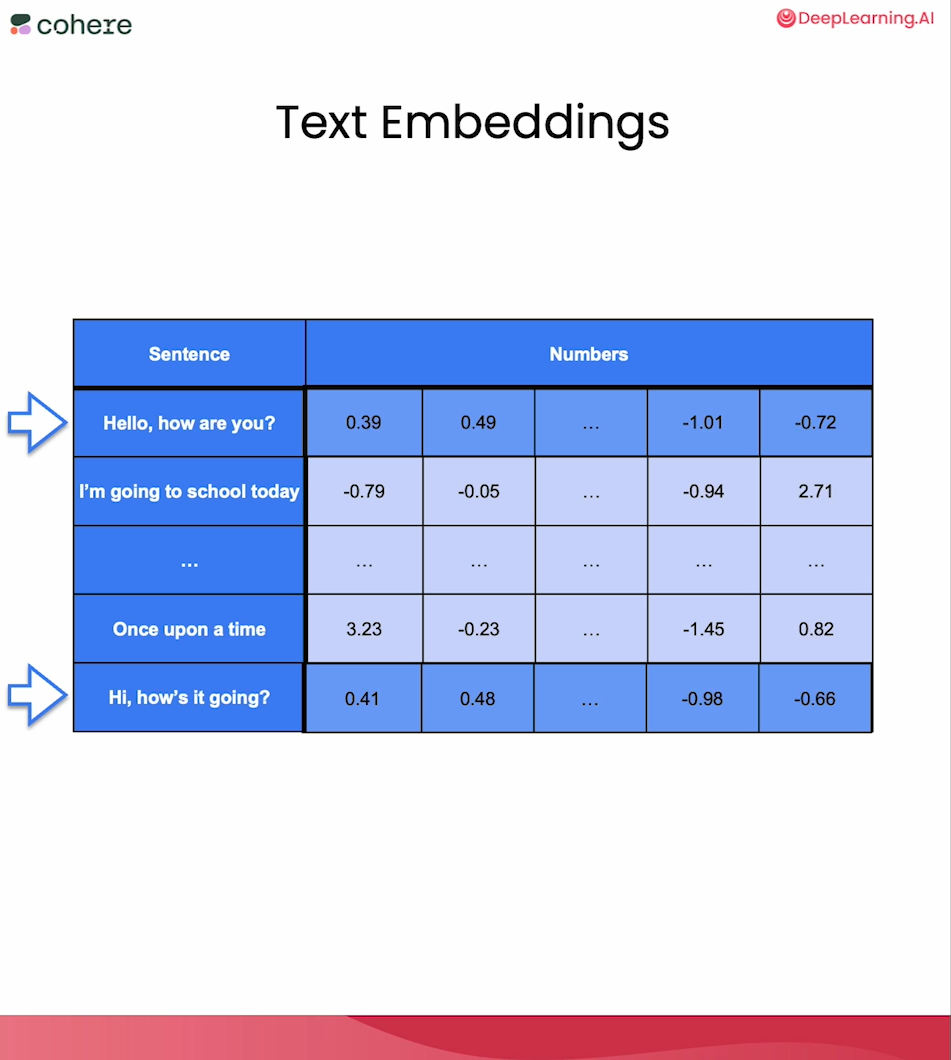

## Sentence Embeddings

Consider a very small dataset of three sentences.

We're going to take a look at a small data set of sentences. This one has eight sentences, as you can see. They are in pairs. Each one is the answer to the previous one.

In [ ]:
sentences = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})

sentences

*OUTPUT*
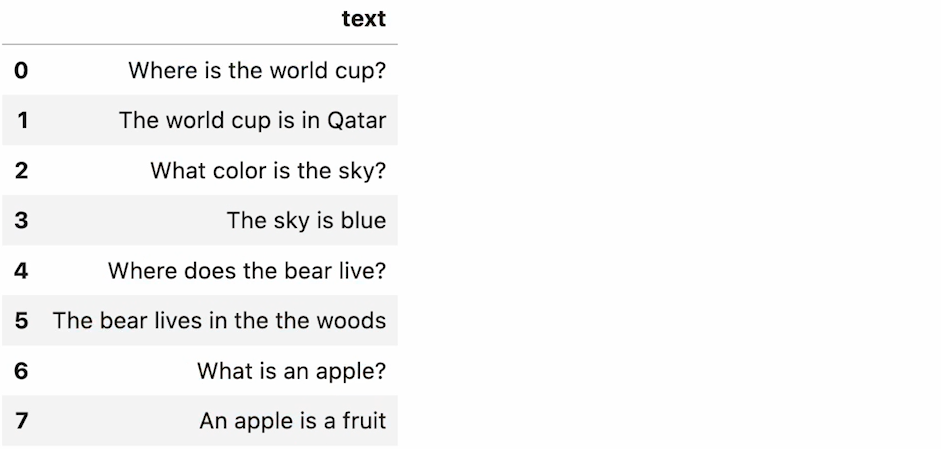

Let's create the embeddings for the three sentences:

This function is going to give us all the embeddings and it takes some inputs. The first input is the table of sentences that we want to embed. So the table is called sentences and we have to specify the column, which is called a text. The next input is the name of the model we're going to use. Finally, we extract the embeddings from the output of this function. This function is going to give us a long list of numbers for each one of the sentences. Let's take a look at the first 10 entries of the embeddings of each of the first three sentences.

In [ ]:
emb = co.embed(texts=list(sentences['text']),
               model='embed-english-v2.0').embeddings

# Explore the 10 first entries of the embeddings of the 3 sentences:
for e in emb:
    print(e[:3])

*OUTPUT*
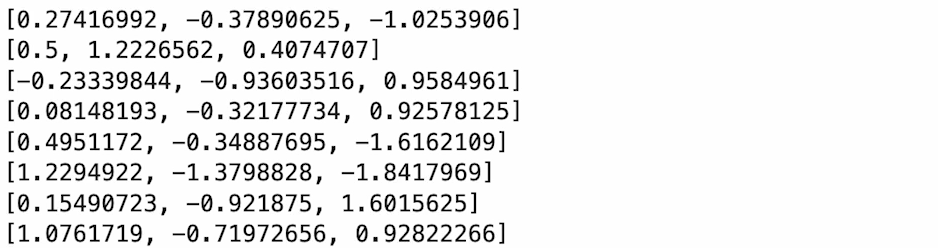

In [ ]:
len(emb[0])

*OUTPUT*
```
4096
```

Now we're going to visualize the embedding. For this we're going to call a function from utils called umapplot. Umapplot uses the packages umap and altair and and it produces this plot over here.

In [ ]:
#import umap
#import altair as alt

In [ ]:
from utils import umap_plot

In [ ]:
chart = umap_plot(sentences, emb)

In [ ]:
chart.interactive()

*OUTPUT*
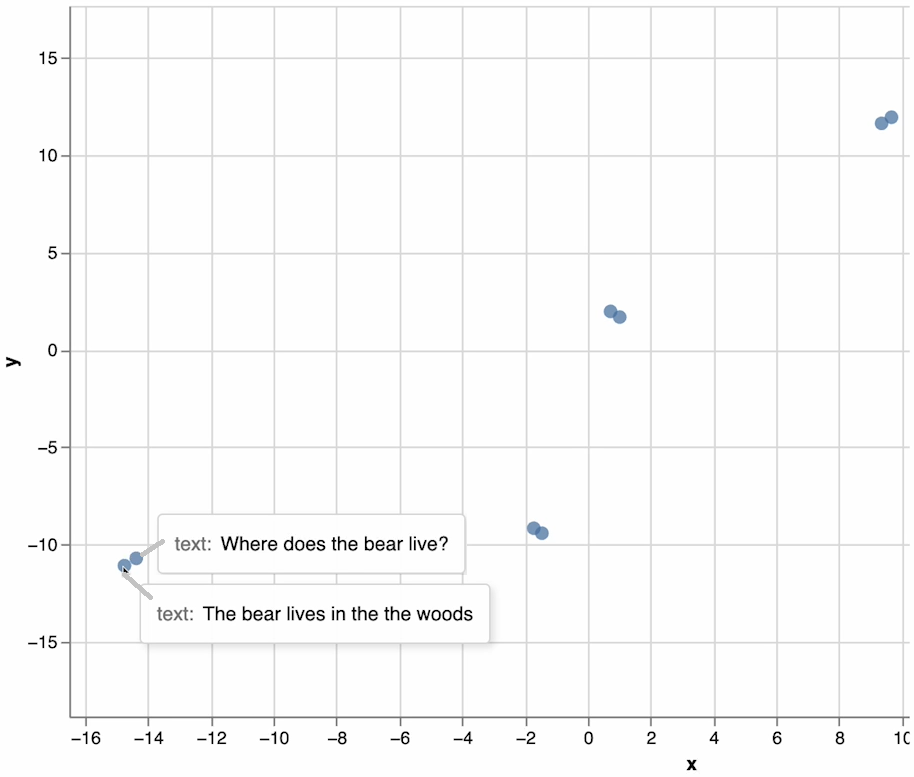

Notice that this plot gives us eight points in pairs of two. And let's look what the pairs are.

This one over here is the bear lives in the woods and the closest sentence is where does the bear live? Which makes sense because they are sentences that are quite similar. Let's look at these two over here. Here we have what is an apple and an apple is a fruit. Over here we have where is the World Cup? The World Cup is in Qatar. And over here we have what color is the sky and the sky is blue. 

So as you can see, the embedding put similar sentences in points that are close by and different sentences in points that are far away from each other. Notice something very particular. The closest sentence to any question is its particular answer. 

So we could technically use this to find the answer to a question by searching for the closest sentence. This is actually the basis for dense retrieval.

## Articles Embeddings

We're gonna work with a big data set of Wikipedia articles. Let's load the following data set. It has a bunch of articles with title, the text of the first paragraph, and the embedding of that first paragraph. And it has 2,000 articles. 

In [ ]:
import pandas as pd
wiki_articles = pd.read_pickle('wikipedia.pkl')
wiki_articles

*OUTPUT*
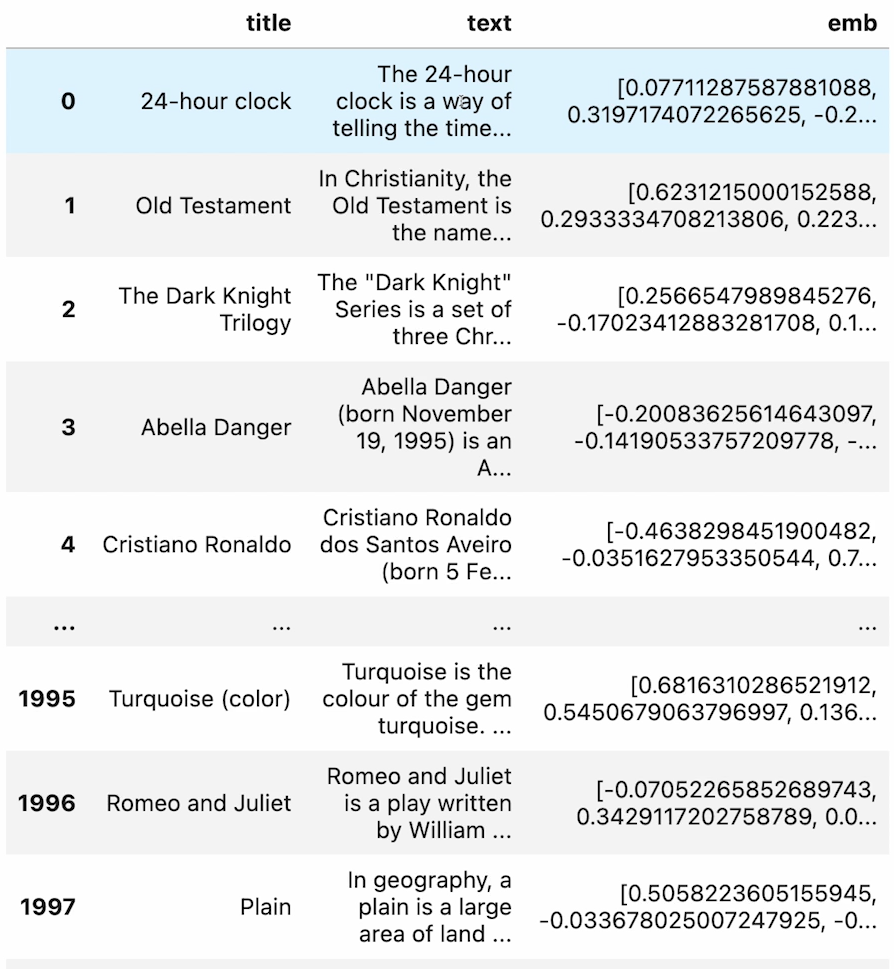

In [ ]:
import numpy as np
from utils import umap_plot_big

In [ ]:
articles = wiki_articles[['title', 'text']]
embeds = np.array([d for d in wiki_articles['emb']])

chart = umap_plot_big(articles, embeds)
chart.interactive()

*OUTPUT*
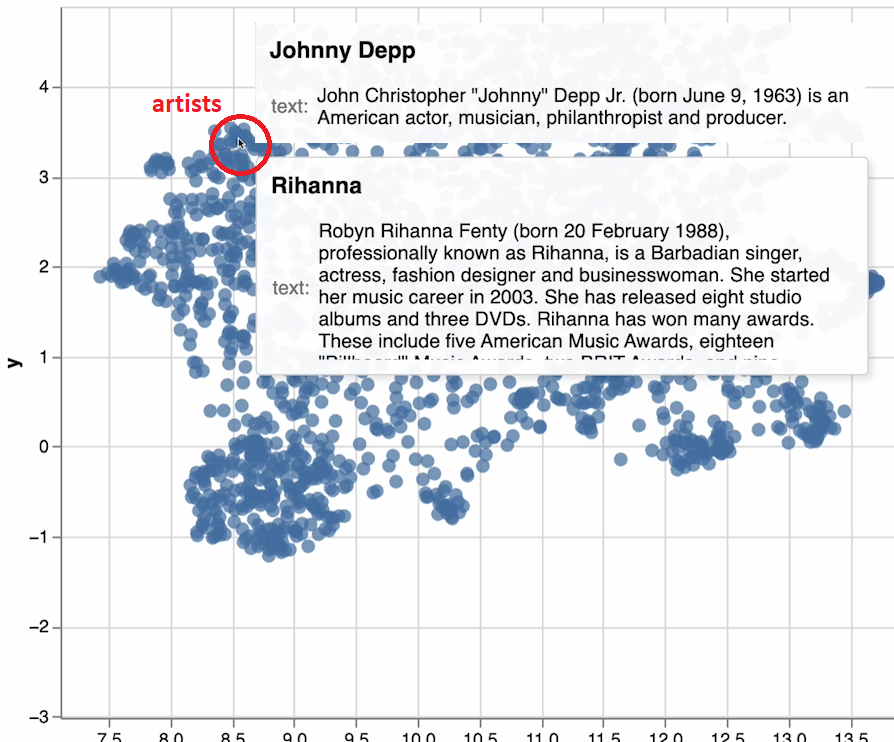

We're gonna import "NumPy" and a function that will help us visualize this plot very similar to the previous one. We're going to bring it down to two dimensions so that it's visible for us. The embedding is over here and notice that similar articles are in similar places. For example, over here you can find a lot of languages. In here, countries. Over here you're going to find a lot of kings and queens. And here you're going to find a lot of soccer players, and over here you're going to find artists. Feel free to explore this embedding and try to find where the topics are located. 